# OttoDiff Documenation: Group 6

**Team Members:**  
Kyra Ballard - *S.M. Applied Computation*  
Paul-Emile Landrin - *S.M. Applied Computation*  
Yaoyang Lin - *S.M. Applied Computation*  
Dan Park - *MS/MBA*  

CS 207 - Systems Development for Computational Science (Fall 2019)

# Introduction

This project aims to provide a working library for automatic differentiation. Automatic differentiation is a method for numerically calculating the derivative of a function. Derivative calculations are essential in many modern numerical algorithms, and automatic differentiation is one method that can quickly compute derivatives by executing elementary functions via the chain rule. 

Compared to other differentiation methods (such as symbolic/analytic differentiation or numerical differentiation), automatic differentiation boasts more efficient calculations and high accuracy to working precision. Symbolic differentiation requires mathematical expressions of derivatives to be kept throughout the process, which can lead to inefficient code. Numerical differentation is heavily reliant on an optimal value of `h`--too small or big values of `h` can lead to large floating point errors or inaccuracy, respectively. Therefore, automatic differentic differentiation provides efficiency and accuracy advantages (in most cases).

# Background

As mentioned above, automatic differentiation (AD) revolves around the fact that any complex function can be decomposed into elementary functions. As such, derivatives for a complex function can be computed from the derivatives of each elementary function, via the chain rule:

\begin{equation}
\frac{df_1}{dx} = \frac{df_1}{df_2} \frac{df_2}{df_3} ... \frac{df_{n}}{dx}
\end{equation}

There are two main methods for automatic differentiation: 1) forward-mode and 2) reverse-mode. In forward-mode, the derivative is calculated "inside-out" (from the independent variable to the outermost function). In reverse-mode, the derivative is calculated "outside-in". We implement both forward-mode and reverse-mode in our project.

AD keeps track of the elementary functions, their derivatives, and the value of the derivative at the given x-value. These functions and values can be summarized in a table called the evaluation trace. By evaluating the derivative at each step, we can compute the value of the derivative at the given x-value. The composition of elementary functions can also be visualized in an evaluation graph.

To illustrate the above, we present an example: 

\begin{equation}
f(x) = 2x^2 + \sin(y)
\end{equation}

at $(x,y) = (4, \frac{\pi}{2})$

This equation has the following evaluation trace:

| Trace   | Elementary Function      | Current Value           | Elementary Function Derivative       | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  |
| :---: | :-----------------: | :-----------: | :----------------------------: | :-----------------:  | :-----------------: |
| $x_{1}$ | $x_{1}$                  | $4$                     | $\dot{x}_{1}$                        | $1$ | $0$ |
| $x_{2}$ | $x_{2}$                  | $\dfrac{\pi}{2}$        | $\dot{x}_{2}$                        | $0$ | $1$ |
| $x_{3}$ | $x_{1}^2$                | $16$                    | $2x_1\dot{x}_{1}$                    | $8$ | $0$ |
| $x_{4}$ | $2x_{3}$                 | $32$                    | $2\dot{x}_{3}$                       | $16$| $0$ |
| $x_{5}$ | $\sin(x_{2})$            | $1$                     | $\cos(x_2)\dot{x}_{2}$               | $0$ | $1$ |
| $x_{6}$ | $x_{4} + x_{5}$          | $33$                    | $\dot{x}_{4}+\dot{x}_{5}$            | $16$| $1$ |

The function can be visualized with the following evaluation graph:
![evaluation_graph.png](./image_m2/evaluation_graph.png)

In execution, forward-mode AD actually computes $\nabla f \cdot p$. However, this needs to be calculated for each seed vector (there is one seed vector for each input variable). Therefore, the computational complexity of forward-mode AD is proportional to the number of input variables. Forward-mode automatic differentiation is more efficient for functions where $ m >> n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $

## Background for Extension Feature: Reverse Mode

For our advanced/extension feature, we implemented the reverse mode. We believe that this is a good complement to the forward mode so that we can compare the efficiency in computing them, under different conditions. Theretically, the two modes should yield the same answer (the true derivative value at a given point) to machine precision.

As mentioned above, forward-mode calculates the derivative "inside-out" (from the independent variable to the outermost function) using the chain rule, and the reverse-mode calculates the derivative "outside-in". For example, consider the following function:

\begin{equation}
y = f(g(h(x)))
\end{equation}

The derivative of the function above would be:

\begin{equation}
\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dw}\frac{dw}{dx}
\end{equation}

where $w = h(x)$ and $u = g(h(x))$.

In forward mode, the the sweep starts from calculating $\frac{dw}{dx}$, then $\frac{du}{dw}$, then $\frac{dy}{du}$ (inside-out). Forward-mode is advantageous in cases where $ m >> n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $ for reasons described before. 

In reverse-mode, there are two sweeps. The first sweep is a forward sweep that calculates the function values and partial derivatives at each intermediate step. The second sweep is a reverse sweep that starts from $\frac{dy}{du}$, then $\frac{du}{dw}$, then $\frac{dw}{dx}$ (outside-in) to compute the numerical values of the partial derivatives. We start with:

\begin{equation}
\bar{x}_{N} = \frac{\partial f}{\partial x_N} = 1
\end{equation}

Then we start sweeping inwards:

\begin{equation}
\bar{x}_{N-1} = \frac{\partial f}{\partial x_N} \frac{\partial x_N}{\partial x_{N-1}}
\end{equation}

Reverse mode, different from the forward mode, does not compute derivatives simultaneously. Instead, it requires the storage of intermediate variables $(u, w,$ etc.$)$ and backpropagate the gradient from the opposite version of the operation flow. Therefore, the computational complexity is proportional to the number of functions (i.e. for cases in which $ m << n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $)


# How to Use *OttoDiff*

### How to install

#### Use pip to install

Our package has been posted to **PyPI** as `OttoDiff` to make installation easy for users. Users are allowed to install the package by typing the following command.

`pip install OttoDiff`


The file `requirements.txt` contains dependent packages that the user needs to be able to run OttoDiff (such as numpy>=1.14.3).

#### Install manually in Virtual Environment  (CONDA)

User are also allowed to install the package following these steps on the command line:
0. Download the yaml file `ottodiff_env.yaml`, found in the root directory of the project repository.
1. Set up a virtual environment: `conda env create --file=ottodiff_env.yaml`
2. Activate the virtual environment: `conda activate ottodiff_env`
3. Clone the repo by `git clone https://github.com/CreativeAutomaticDifferentiators/cs207-FinalProject.git`
4. `cd cs207-FinalProject`
5. Install all of the dependencies packages required for this project: `pip install -r requirements.txt`
6. install OttoDiff by : `pip install OttoDiff`
7. Quit by : `deactivate`

### Demo: How to use OttoDiff to calculate derivatives

The user should first import the package to use it:

In [1]:
import numpy as np
from OttoDiff.forward import *
from OttoDiff.reverse import *

Here's a basic demo about how to use the Package for three different cases:
### Univariate derivative calculation

The core class of the forward mode is `Variable`, which stores both the value and the partial derivatives of a variable (expression). User can define any functions f(x) which made by any operations of x. And the derivative and value of f(x) would be automaticly calculated and been stored in the `val` and `der` attribute of the `Variable` during the forward process. Because the operator is overloaded and a new return 

For example, user create an function $f(x) = \ln(x) + 3x + 1$, we can manually calculate its derivative $f'(x) = \frac{1}{x} + 3$. When $x = 2$, we know that $f(x) = \ln(2) + 7 = 7.6931$ and $f'(x) = 3.5$.

The calculation would be much easier if our package is used. The user just need to create the `Variable` x first by `x = Variable(x_val)`, use the operations of `Variable` x to create a function f(x). Then the value and derivative would be automatically stored in the attributes of f(x) and user can easily check them by print.

In [2]:
x = Variable(2)
f_x = np.log(x) + 3*x + 1
print(f_x)

val: 7.693147180559945 der: 3.5


### Mutivariate derivative calculation

The current implementation also support mutivariate derivative calculation. Most part usage is similar but the user has to initialize the partial derivatives for this usage. 

For example, user create an function $f(x, y) = \ln(x) + 3y + 1$, we can manually calculate its partial derivative $\frac{\partial f}{\partial x} = \frac{1}{x}$ and $\frac{\partial f}{\partial y} = 3$. When $x = 2, y = 1$, we know that $f(x) = \ln(2) + 4 = 4.6931$ and $\frac{\partial f}{\partial x} = 0.5$ and $\frac{\partial f}{\partial y} = 3$.

With the help of createVariables of AutoDiffFwd() class, user are allowed to create all the the variables they want by this function. The user does not need to specify the der of Variable like der = [1,0], the AutoDiffFwd would automatically figure it out and assign an der to each Variable. In the AutoDiffFwd class, der of each Variable is a numpy array (length = number of variables in the equations). Each element of the array represents a unique variable. And finally the package will also return the partial derivative as the same order the class defined, in this case $[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$.

In [3]:
autodiff = AutoDiffFwd()
x, y = autodiff.createVariables(['x', 'y'], [2, 1])
f = np.log(x) + 3*y + 1
print(f)

val: 4.693147180559945 der: [0.5 3. ]


### Mutivariate Vector Functions

The forward mode of the package also support the the vector function derivative calculation. In order to use that functionality, the user should first create several non-vector functions following the guidence above and use `autodiff.createVectorFunction` to combine them into a vector function.

In [4]:
autodiff.reset()
x, y = autodiff.createVariables(['x', 'y'], [1, 2])
f1 = x * y
f2 = x + y
vec_f = autodiff.createVectorFunction([f1, f2])
print(vec_f)
print(vec_f.get_jacobian())

vals: [2 3] jacobian: [[2. 1.]
 [1. 1.]]
[[2. 1.]
 [1. 1.]]


### [Demo]: How to use OttoDiff for root-finding algorithm (e.g. Newton's method)

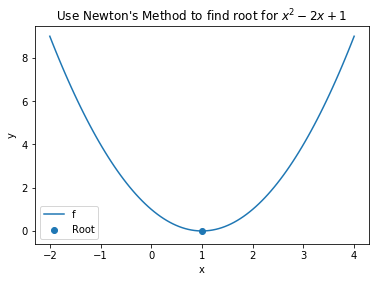

In [5]:
from matplotlib import pyplot as plt

def newtons_method(f, x, tolerance=1e-6):
    '''f is the function f(x)'''
    while True:
        df = f(Variable(x))
        x1 = x - (f(x) / df.der)
        t = abs(x1 - x)
        if t < tolerance:
            break
        x = x1
    return x

f = lambda x: x**2-2*x+1
sol = newtons_method(f, -1)

xs = np.linspace(-2,4,100)
plt.plot(xs, f(xs), label="f")
plt.scatter(sol, f(sol), label="Root")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Use Newton's Method to find root for $x^2 - 2x + 1$")
plt.legend()
plt.show()

### [Extension]: Reverse Mode

Similar to the forward mode, the reverse mode allow us to calculate the derivative easily. User is allowed to create a node Variable with the value they want at first, For example, they can create variable x with value 3. Then they can just use the function in the package `find_df_dx` to find the the patial derivative of f with respect to x. The reverse mode supports all the operations in the forward mode and also mulltivariate cases.

In [6]:
x = VariableNode(2)
f = np.log(x) + 3 * x + 1

print(find_df_dx(f, x))

3.5


In [7]:
a = VariableNode(1)
b = VariableNode(2)

f2 = np.sin(a) + np.sqrt(b)
print(find_df_dx(f2, a))

0.5403023058681398


### [Extension]: Visualization of the Computaional Graph

Another extension we implemented is the visualization of the reverse mode Computaional Graph. As the function get complicated, it gets much harder to confirm if the computaional architectures are constructed properly. Hence, visualization of the computational graph could be very helpful. Below are the code to generate the computaional graph visualization. It is pretty straightforward to use by calling `visualize(function_node)`, a new computational graph would been stored in the root directory.

In [8]:
from OttoDiff.visualization import *

x = VariableNode(2)
f = np.log(x) + 3 * x + 1
visualize(f)

This is the Computaional Graph generated from the above code, as we can see, the user can easily check about the value, operation, and the relationship between the node.
![comp_graph.png](./image_m2/comp_graph.png)

# Software Organization

```
cs207-FinalProject/
	OttoDiff/
        forward.py
        reverse.py
        visualization.py
        tests/
            test_forward.py
            test_reverse.py
	docs/
        documentation.ipynb
        milestone1.md
        milestone2.ipynb
        image_m2/
            evaluation_graph.png
	.travis.yml
    ottodiff_env.yaml
	README.md
	requirements.txt
	setup.py
```

### Directory structure

1 OttoDiff/

The `OttoDiff` directory contains the different code modules. It contains the forward-mode implementation, the reverse-mode implementation, the code for visualization, and the corresponding tests in the `tests` folder. 

2 docs/

The `docs` directory contains the documentations correpond to each milestone. The final documentation (this document) and Milestone 2 documentation were submitted as a python notebook, to demonstrate in-line demos for how to use our package. There is also a `evaluation_graph.png` image that is referenced in this documentation.

3 ./

The root directory of `cs207-FinalProject` contains the following additional files for installation and configuration:
* `.travis.yml` - contains our configuation for TravisCI and CodeCov
* `ottodiff_env.yaml` - contains the yaml configuration file to setup a virtual environment.
* `README.md` - contains basic information about our project (members, group number, etc.). Also has badges to help us easily understand code coverage and build pass/fail info.
* `requirements.txt` - outlines dependencies on other packages for our project. Mainly `python`, `numpy`, and `math`.
* `setup.py` - a python file that configures installation with `pip`. 

### Basic modules and functionality

There are three implemented modules: `forward`, `reverse`, and `visualization`.

The `forward` module contains the implementaion of class `Variable`, which is the core class for calculating the value and derivative of any variable (expression) by overloading the basic operators. A second class `VectorVariable` is an extension of the `Variable` class that allows for vector functions. We also included one extra class in this module: `AutoDiffFwd`, which serves as a management class to handle the case of mutiple variables and vector functions.
  
The `reverse` module includes classes used for reverse mode. The class proposed to include in this module is `VariableNode`. It would be used to build the computational graph required by reverse mode.

The `visualization` module uses the the `graphviz.Digraph` package to generate computional graphs.

### Testing

Our tests are contained in test directory in modules.

test_forward.py: It includes tests for scalar and vector functions of Variable such as (+, -, *, /) is successfully overloaded by own implementation. It also make sure that the exponential and trig functions of numpy is also overloaded by our implementation. It checks that the calculation of expression of variable and derivative is correct by manual calculation. It also ensure that an useful error message is raised when user type in invalid input.

test_reverse.py: This is a similar test file for the reverse-mode. The instantiation of the VariableNode class is different due to the nature of reverse-mode.

We used Travis CI and CodeCov to keep track of the testing progress. We have already set up these integrations, which can be visualized by the badges in the README.md. It shows that our tests covers 97% of the code now.

If user are intrested in adding more tests and run their self-defined test, they can add them in the file test_forward.py and run the command: `python -m pytest ./forward/tests/test_forward.py`. This can be done for the reverse-mode as well.


### Packaging

We follow instructions on https://packaging.python.org/tutorials/packaging-projects/ to package our code and distribute it on PyPI. We use `twine upload dist/*` to upload our package. Details about how to install the package are discussed in the previous section.

# Implementation

## Overview

In the forward mode, we implemented Variable class, VectorVariable class, AutoDiffFwd class. 

`Variable` : An object of this class as two attributes val and der which stands for the value and the derivatives. We can then do some operations on this variable like addition, multiplication, or composition. This will generate another variable with updated values and derivatives.

`VectorVariable` : An object of this class is a special case of the Variable. For VectorVariable, the attribute val is an array instead of number, the attribute der is a matrix instead of a list. der in this class is acturally Jacobian matrix, which is the matrix of partial derivatives of variables for differentiation. Allowing val to be array can also do the same things but we decide to define another class in case there are some new features need to been developed for the vector in the future.

`AutoDiffFwd` : Previously, if we want to calculate the gradients of an expression with several variables (function with several inputs), we need to specify the derivative as an array whose only coefficient that is non-zero is the coefficient of the index of that variable. For example, if you want to use two variables you need to declare the variables as follow, the two derivatives that you would put in the Variable will be the arrays [1,0] and [0,1]. This class is trying to avoid this problem due to the encapsulation reason. The user can now work with multiple variables without worrying about the initialization of derivatives.

In the reverse mode, which is part of our extension, the core classes are VariableNode class and Constant class.

`VariableNode` : The object can been viewed as as an node in the computational graph. During the computational process, any intermediate result would be stored as a VariableNode and been added into the children list of the parent nodes. For example, z = x + y, a new VariableNode z is created and is the child of x and y.

`Constant` : The object is a special case of the VariableNode. A Constant VariableNode would always have 1 as gradient.

## Core data structures

List and Numpy array: Array is the data structure we heavily used. Use a numpy array which length equal to the number of variables to store partial derivatives. We also use a 2D numpy array which shape is (vector length, variable number).

Dictionary and hashmap: We use the data structure in our implementaion for manangement of mutiple Varibles and vector functions. It is used to record the mapping relationship between the index of variable in the list and its name. For example, for dict var2index = {x:0, y:1, z:2} and partial derivatives [1, 2, 3]. We know that $\frac{\partial f}{\partial x} = 1$, $\frac{\partial f}{\partial y} = 2$, $\frac{\partial f}{\partial z} = 3$

Graph/Tree: We inplicit use that data structure in the reverse mode. The key idea of the reverse mode is to build a computational graph during the intermediate computaion. And the the gradient of each node can be found recusively due to the graph/tree property.


## Core classes

There are 5 classes in our implementation. Variable, VectorVariable, AutoDiffFwd are our core classes in the forward mode. VariableNode and Constant are our core classes in the reverse mode.
### Variable

#### Important attributes

The core class `Variable` has two important attributes:

val: int/float, value of variables for differentiation
     
der: int/float or np.array if mutiple variable, derivative (partial derivatives) of variables for differentiation. If it is an array, each entry represents an partial derivatives [$\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, $\frac{\partial f}{\partial z}$, ...]

#### Methods

The following methods is implemented for the Variable class to overload the original operators:

`__init__`: initialize a Variable class object, user inputed value is required, which stored as float/int for current implementation (would extend to array in the future). Derivatives initialization is optional, It would be setted to 1 if the user do not specify about it.

`__eq__`: overload the comparator to make sure two variables are equal if and only if their val and der are equal.

`__ne__`: overload the comparator to compare two variables.

`__neg__`: overload negitive function

`__str__`: overload the defult str method, by calling `print(self)`, an help message `val: [value] der: [Derivatives]` would be printed.

`__add__`: overload add function to handle addition of two Variable class objects or addition of Variable and a number.

`__radd__`: right addition similar to `__add__`.

`__sub__`: overload minus function to handle subtraction of two Variable class objects or subtraction of Variable and a number.

`__rsub__`: right subtraction similar to `__sub__`.

`__mul__`: overload multiplication function to handle multiplication of two Variable class objects or multiplication of Variable and a number.

`__rmul__`: right multiplication similar to `__mul__`.

`__truediv__`: overload division function to handle division of two Variable class objects or division of Variable and a number.

`__rtruediv__`: right division similar to `__truediv__`.

`logistic`: caculate the direvative of Logistic function.


We also overloaded several function of the numpy library, these functions can be called by `np.sin(Variable)`

`sin()`

`cos()`

`tan()`

`sinh()`

`cosh()`

`tanh()`

`arcsin()`

`arccos()`

`arctan()`

`sqrt()`

`exp()`

`log()`



### VectorVariable

#### Important attributes
The class `VectorVariable` is the Child class of `Variable` which has two similar important attributes:

val: np.array, values of variables for differentiation
     
der: 2D np.array, der here stands for Jacobian matrix, which is a matrix of partial derivatives of variables for differentiation. Each row of the matrix represents an partial derivatives of an function (∂f1/∂x, ∂f1/∂y, ∂f1/∂z, ...). Each column represents an partial derivatives with respect of one variable (∂f1/∂x, ∂f2/∂x, ∂f3/∂x, ...)

#### Methods

Most of overloading operators are inherited from the parent class `Variable` to make the vector function still support basic operations such as adding an constant. However, the Vector Variable has slight difference so that some method need to be overloaded to match the property of Vector.

`__str__`: Since val is an array and der is jacobian in in VectorVariable, the str method is slightly changed.

`get_jacobian`: jacobian is exactly the same as der attribure in VectorVariable.

`__eq__`: Since the val is changed from int/float to array, comparator should be changed to support array comparation. Again two VectorVariables are equal if and only if their value array and jacobian matrix are exactly the same.

`__ne__`: Overload the not equal comparator.

### AutoDiffFwd

#### Important attributes

The class `AutoDiffFwd` only has one important attribute:
var2idx: dictionary, is used to track the variable information about the computation. For example, we can know how many variables are been created in this computation by the length of var2idx. We can know all names of the variables and the index for each variable in the derivatives. For example, given an partial derivatives [1, 2, 3] and var2idx = {'x':0, 'y':1, 'z', 2}, we know the first entry represents the partial derivative with respect to x.

#### Methods
`createVariables`: Used for creating all variables needed in the following computation so that the user do not need to specify the derivatives in the multivariate computation.

`reset`: Clear the variables recorded in order to be reused in new computation in order to reuse the class in the future computation.

`createVectorFunction`: Used for creating a vector function from a list of non-vector functions.

`getVerboseInformation`: Print out some helpful information about the given variable. For example, whether the variable is vector function or mutivariable function.


### VariableNode

#### Important attributes

val: stores the value of the node in the graph

_grad : stores the gradient of the final output node f with respect to current node (∂f/∂(x))

parents : stores the parents of the current node in the computaional graph, used for the visualization part.

operation: stores the operation computed in the current node.

children: stores the children of the current node in the computaional graph, used for compute the grad.

idCounter: use to identify each node in the graph, for the visualization purpose

name: name of the node is composed of node id, operation, value, used for the visualization part.
        

#### Methods
The key method of find the derivative in the VariableNode is `compute_grad`.

`compute_grad` : The gradient of the current node is been computed from the gradient of the child node by chain rule. Whenever the node gradient value is calculated, it is cached in _grad attribute.

VariableNode also support exactly the same number of operations as Forward mode, including basic operations, Trig functions, exponentials and so on. By operator overloading, when the user types the fomula, an computaional graph is been implicitly created and user can visualize the graph by the visualization module of the package.

`__neg__`

`__str__`

`__add__`

`__radd__`

`__sub__`

`__rsub__`

`__mul__`

`__rmul__`

`__truediv__`

`__rtruediv__`

`logistic`

`sin()`

`cos()`

`tan()`

`sinh()`

`cosh()`

`tanh()`

`arcsin()`

`arccos()`

`arctan()`

`sqrt()`

`exp()`

`log()`

### Constant
        
Constant is just an specific type of VariableNode, it inherit all the attributes and Methods from the parent class. The only difference is that it has a different way to compute gradient.

#### Methods
`compute_grad` : the gradient of the Constant node is always 1.


### Other Methods
`visualize`: It is been used to visulize the computational graph we created in the reverse mode computation.

`find_df_dx`: In the reverse mode, used to find the partial derivative of f with respect to given x.

## External dependencies

Numpy: used for mathematical calculations. We rely on the numpy library for implemented the following elementary functions: power, exponential, logarithm, sinus, cosinus, tangente, arcsinus, arccosinus and arctangente. 

pytest: used to create simple as well as complex functional test cases.

TravisCI and Codecov: used for test integration and coverage check.

graphviz: used for visulizing the computational graph.

# Future Work

In this section, we discuss future work that extends beyond the timeframe of this class and applications for how OttoDiff can be used.

### Next Steps for OttoDiff
There were many additional features that we considered implementing if we had additional time for this project. 

**Gradient Descent to Find Local Maxima/Minima**  

One useful tool in mathematics is the ability to iteratively find the local maximum or the minimum of the function. In gradient descent, one iterates through the function by traveling a distance proportional to the derivative, in the negative direction. 

Gradient descent can be described using the following equation:
\begin{equation}
\mathbf{a}_{n+1} = \mathbf{a}_n - \gamma \nabla F(\mathbf{a}_n)
\end{equation}

where $\gamma$ is the learning rate (dictates how much to travel in the opposite direction). A next step for OttoDiff would be to create a method for gradient descent that accepts a function, starting point, and the learning rate as inputs, then uses OttoDiff to generate the gradient for the function at the starting point, and iterates until a local minimum was found. We can also find the local maximum of the function by utilizing gradient ascent:

\begin{equation}
\mathbf{a}_{n+1} = \mathbf{a}_n + \gamma \nabla F(\mathbf{a}_n)
\end{equation}

**User Interface to Simply the Usability of OttoDiff**

Another potential feature we could have implemented was to package the code in a runtime executable so that users can use AutoDiff without running code. Doing so would have simplified the setup and instantiating variables. Additionally, it would have allowed users without Python or computer science background to be able to easily find derivative values for scalar and vector functions of single or many variables. Our visualization feature for evaluation graphs would have integrated well into this executable, as a way to help users visualize what is happening under the UI, on a mathematical level.

### Applications for Automatic Differentiation
There are many applications of derivatives that would be enabled by the computational efficiency of Automatic Differentiation. The following is one example:

**Edge Detection in Image and Video Processing**

In the past few years, the number of machine vision applications and the need for real-time image/video processing have increased dramatically. For many applications such as video processing for autonomous vehicles, the computation times must be extremely low in order to prevent accidents. Additionally, with advancing image capture technologies leading to higher resolution pictures and new formats such as 3D video that require have data files, there is a need for highly efficient methods.

Take edge detection for example. Edge detection is a fundamental tool in image/video processing that enables object detection and image classification. As a simplified explanation, edge detection works by finding sharp increases or decreases in pixel values, which can indicate the presence of edges. Notice that this is an application of finding points of high derivative values via differentiation! Finding edges significantly simplifies object classification, which then leads to so many applications.

Automatic differentiation is a great tool for this application due to its computational efficiency. In autonomous vehicles, the vehicles capture up to 120 images per second, and the reaction times to recognize objects such as other cars or humans need to be as low as possible. Leveraging automatic differentation would be a great choice for image processing applications.